# Data Discretization
`Data Discretization:` is a preprocessing technique that is used to transform contionous or numerical data into discret  categories or bins. This process can particuallary useful for machine learing algorithim that handle categorical data more effectivley then contionous data. it can also improve model interpretibilty and handle outliers more robustly.

`For example:` Age of [30,20, 50,10, 5] in that range into (young, teens, old, child, toddlers)

In [16]:
# import library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import KBinsDiscretizer

In [17]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# imputing missing values 
df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)

<Axes: xlabel='age', ylabel='Count'>

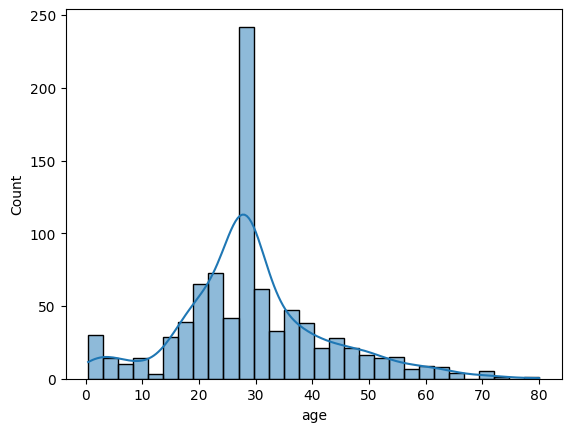

In [19]:
sns.histplot(df['age'],kde=True)

In [20]:
# calling discretizer here
dis=KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# fit the model
df['age_bin']=dis.fit_transform(df[['age']])
df.head()

c:\Users\Basit\miniconda3\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0


<Axes: xlabel='age_bin', ylabel='Count'>

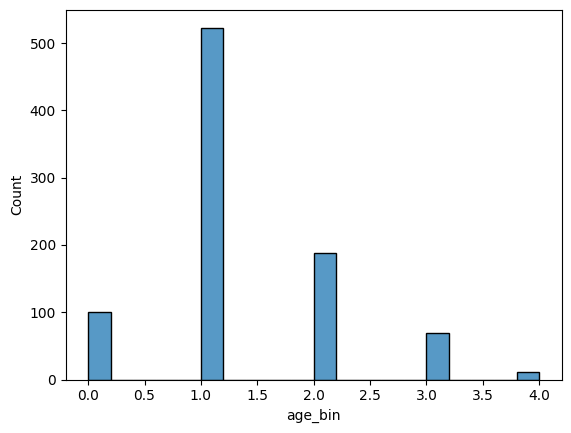

In [21]:
sns.histplot(df['age_bin'])

<Axes: xlabel='age', ylabel='Count'>

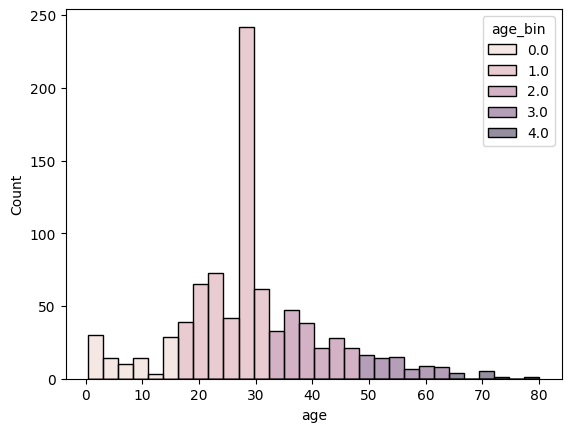

In [23]:
sns.histplot(df, x='age', hue='age_bin')

In [24]:
# pandas method of bining
df['age_bin2']=pd.cut(df['age'],bins=3 ,labels=[0,1,2])

<Axes: xlabel='age_bin2', ylabel='Count'>

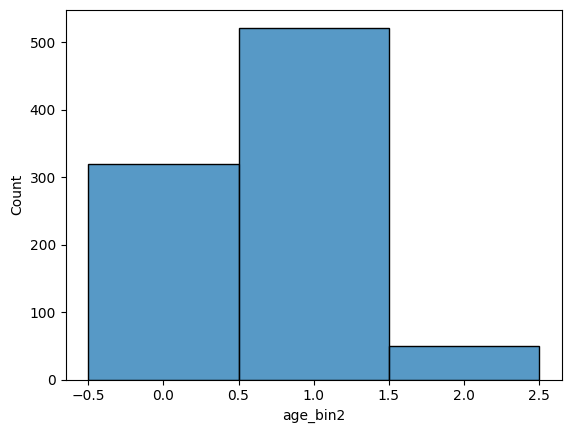

In [25]:
sns.histplot(df,x='age_bin2')

<Axes: xlabel='age', ylabel='Count'>

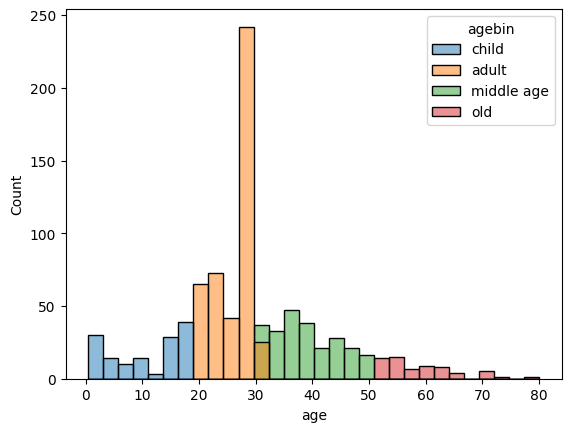

In [27]:
# defining the bins 
bins=[0,18,30,50,80]
labels=['child','adult','middle age','old']
df['agebin']=pd.cut(df['age'],bins=bins,labels=labels)
sns.histplot(df,x='age',hue='agebin')